ONLINE PAYMENT FRAUD PREDICTION (LOGISTIC ALGORITHM) (BY:P SWATHIKA)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/extra_need/Datas/Fraud Detection Dataset.csv")

In [3]:
df=df.dropna()

In [4]:
df = df.drop(["Transaction_ID", "User_ID"], axis=1)

In [5]:
encoders = {}
cat_cols = ["Transaction_Type", "Device_Used", "Location", "Payment_Method"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [6]:
features = ["Transaction_Amount", "Transaction_Type", "Device_Used", "Payment_Method", "Location"]
X = df[features]
y = df["Fraudulent"]

In [7]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
model = LogisticRegression()
model.fit(X_scaled, y)
print("Model trained successfully!")

Model trained successfully!


In [9]:
pickle.dump(model, open("/content/drive/MyDrive/extra_need/h5_pkl/fraud_detect.pkl", "wb"))
pickle.dump(sc, open("/content/drive/MyDrive/extra_need/h5_pkl/scaler_fraud.pkl", "wb"))
pickle.dump(encoders, open("/content/drive/MyDrive/extra_need/h5_pkl/encoders_fraud.pkl", "wb"))
print("Model, scaler and encoders saved!")

Model, scaler and encoders saved!


In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pickle

model=pickle.load(open('/content/drive/MyDrive/extra_need/h5_pkl/fraud_detect.pkl', 'rb'))
sc=pickle.load(open('/content/drive/MyDrive/extra_need/h5_pkl/scaler_fraud.pkl', 'rb'))
encoders=pickle.load(open('/content/drive/MyDrive/extra_need/h5_pkl/encoders_fraud.pkl', 'rb'))
print("Model Loaded")

Model Loaded


In [11]:
amount = float(input("Enter Transaction Amount: "))
t_type = input("Enter Transaction Type (example:ATM Withdrawal,Bill Payment,POS Payment,Bank Transfer ): ")
device = input("Enter Device Used (example: Mobile,Tablet,Desktop): ")
meth = input("Enter Payment Method (example: UPI,Debit Card,Credit Card): ")
location = input("Enter Location (San Francisco, New York,Chicago,Boston): ")

Enter Transaction Amount: 20000
Enter Transaction Type (example:ATM Withdrawal,Bill Payment,POS Payment,Bank Transfer ): Bank Transfer
Enter Device Used (example: Mobile,Tablet,Desktop): Mobile
Enter Payment Method (example: UPI,Debit Card,Credit Card): UPI
Enter Location (San Francisco, New York,Chicago,Boston): New York


In [12]:
t_type_enc = encoders["Transaction_Type"].transform([t_type])[0]
device_enc = encoders["Device_Used"].transform([device])[0]
meth_enc = encoders["Payment_Method"].transform([meth])[0]
location_enc = encoders["Location"].transform([location])[0]

In [13]:
user_scaled = sc.transform([[amount, t_type_enc, device_enc, meth_enc, location_enc]])
prediction = model.predict(user_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
if prediction==0:
  print("Safe Transaction")
else:
  print("Fraudulent Transaction")

Safe Transaction


In [15]:
amount_range = np.linspace(
    X["Transaction_Amount"].min(),
    X["Transaction_Amount"].max(),
    100)

In [16]:
fixed_type = int(X["Transaction_Type"].mean())
fixed_device = int(X["Device_Used"].mean())
fixed_payment = int(X["Payment_Method"].mean())
fixed_location = int(X["Location"].mean())

In [17]:
X_plot = np.array([
    [amt, fixed_type, fixed_device, fixed_payment, fixed_location]
    for amt in amount_range
])

In [18]:
X_plot_scaled = sc.transform(X_plot)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
fraud_prob = model.predict_proba(X_plot_scaled)[:, 1]

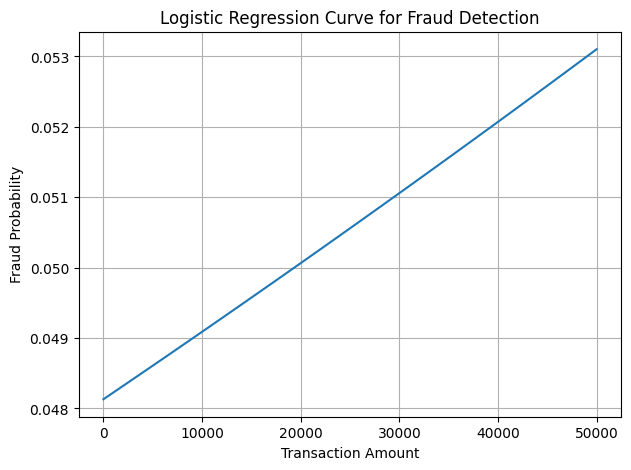

In [21]:
plt.figure(figsize=(7,5))
plt.plot(amount_range, fraud_prob)
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud Probability")
plt.title("Logistic Regression Curve for Fraud Detection")
plt.grid(True)
plt.show()